In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2

In [2]:
plt.rcParams['figure.figsize'] = [6, 8]

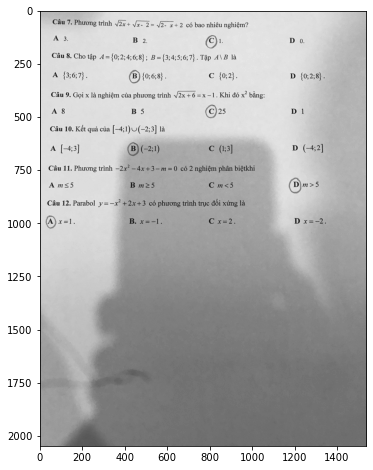

In [3]:
# Chuyển thành ảnh xám
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

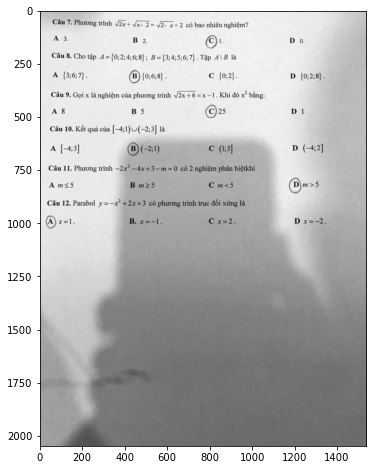

In [4]:
blurred = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(blurred, cmap='gray')

In [ ]:
# Chuyển thành ảnh đen trắng bằng Gaussian Threshold 
# (với những phép toán như tìm contour hoặc binary_fill_holes sẽ xử lý hiệu quả hơn trên ảnh đen trắng nên cần có bước này)
im = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,31,7)
plt.imshow(im, cmap='gray')

In [ ]:
from scipy.ndimage.morphology import binary_fill_holes

# binary_fill_holes là 1 hàm binary delation
clean_image = binary_fill_holes(255 - im)
plt.imshow(clean_image, cmap='gray')

In [ ]:
clean_image = np.float32(clean_image)

In [ ]:
# Opening (mục đích để loại bỏ trường hợp 2 hình tròn dính nhau, hoặc hình tròn dính vào chữ, 
# tuy nhiên opening làm mất dấu khi các hình tròn bị gạch chéo)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
opening = cv2.morphologyEx(clean_image, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

In [ ]:
# Closing (thử cho vui thôi, không hiệu quả)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
closing = cv2.morphologyEx(clean_image, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

In [ ]:
# Lấy ra vị trí các contour (contour là 1 chuỗi tọa độ (x_i, y_) các điểm có cùng độ sáng dọc theo biên của 1 object (t đang hiểu là thế))
contours, _ = cv2.findContours(opening.astype(np.uint8), # pylint: disable=unused-variable
                                  cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_NONE)

# Vẽ contour
obj_image = np.zeros(opening.shape)
for index, cnt in enumerate(contours):
    print(cnt.shape)
    print(cnt)
    cv2.drawContours(opening, [cnt], 0, 255, -1)

In [ ]:
class points:  
    def __init__(self, cx, cy):  
        self.cx = cx 
        self.cy = cy 

In [ ]:
import matplotlib.pyplot as plt

round_thresh = 0.8

plt.figure()
height, width = obj_image.shape
plt.imshow(opening.astype(np.uint8), cmap='gray')
areas = []
alphas = []
pointsA = [] 

# print('Object      Area Perimeter Roundness')
for ind, contour in enumerate(contours):
    # tính chu vi của contour
    perimeter = cv2.arcLength(contour, True)
    # tính diện tích của contour
    area = cv2.contourArea(contour)
    areas.append(area)
    
    # nếu như chu vi bằng 0 hoặc area nhỏ hơn threshold thì ta đặt ngay góc alpha = 0
    if perimeter==0 or area<600:
        alpha = 0
    else:
        alpha = 4*np.pi*area/(perimeter**2)
        alphas.append(alpha)

    # Vẽ vòng tròn đỏ tại tâm của contour thỏa mãn điều kiện là vòng tròn
    if alpha > round_thresh:
        moments = cv2.moments(contour)
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
        pointsA.append(points(cx, cy));
        print(cx,cy)
        plt.plot(cx, cy, 'ro')
        

axes = plt.gca()
axes.set_xlim([0, width])
axes.set_ylim([height, 0])

plt.show()

In [ ]:
arrayTemplate = []
templateA = cv2.imread('test1_A.jpg', cv2.IMREAD_GRAYSCALE)
templateA = cv2.adaptiveThreshold(templateA,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,31,7)
templateB = cv2.imread('test1_B.jpg', cv2.IMREAD_GRAYSCALE)
templateB = cv2.adaptiveThreshold(templateB,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,31,7)
templateC = cv2.imread('test1_C.jpg', cv2.IMREAD_GRAYSCALE)
templateC = cv2.adaptiveThreshold(templateC,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,31,7)
templateD = cv2.imread('test1_D.jpg', cv2.IMREAD_GRAYSCALE)
templateD = cv2.adaptiveThreshold(templateD,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,31,7)

arrayTemplate.append(templateA)
arrayTemplate.append(templateB)
arrayTemplate.append(templateC)
arrayTemplate.append(templateD)

In [ ]:
check =0 
arrayresult=[]
h = 25
dem=0
for obj in pointsA: 
    crop_img = im[obj.cy-h:obj.cy+h, obj.cx-h:obj.cx+h]
    for i in range(len(arrayTemplate)):
        result = cv2.matchTemplate(crop_img,arrayTemplate[i], cv2.TM_CCOEFF_NORMED)
        loc = np.where( result >= 0.778)
        print(loc)
        for pt in zip(*loc[::-1]):  
            check = 1
            j = i
    if (check == 0):
        arrayresult.append(-1)
    else: 
        arrayresult.append(j)
    print(dem)
    dem += 1
    check=0
   

In [ ]:
arrayresult.reverse()
print(arrayresult)